> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigating 'TMDb' Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> The Movie Database (TMDB) is a community built movie and TV database. The Movie Database is an online crowdsourced database for movie and television information. the site has indexed 393,000+ movies and 73,000+ TV shows across 39 languages.

> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

> Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.
The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected/downloaded for analysis. Read through the description available on the homepage-links present [here](https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub?embedded=True). List all column names in each table, and their significance. In case of multiple tables, describe the relationship between tables. 


## Question(s) for Analysis

  #### - Which genres are most popular?

  #### - Which year has the most releases of movies?

  #### - In which month movies make the best profit?

  #### - What is the top 10 highest-grossing movies?



In [245]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import operator

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### Loading tmdb data

In [44]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [45]:
df.shape

(10866, 21)

In [46]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

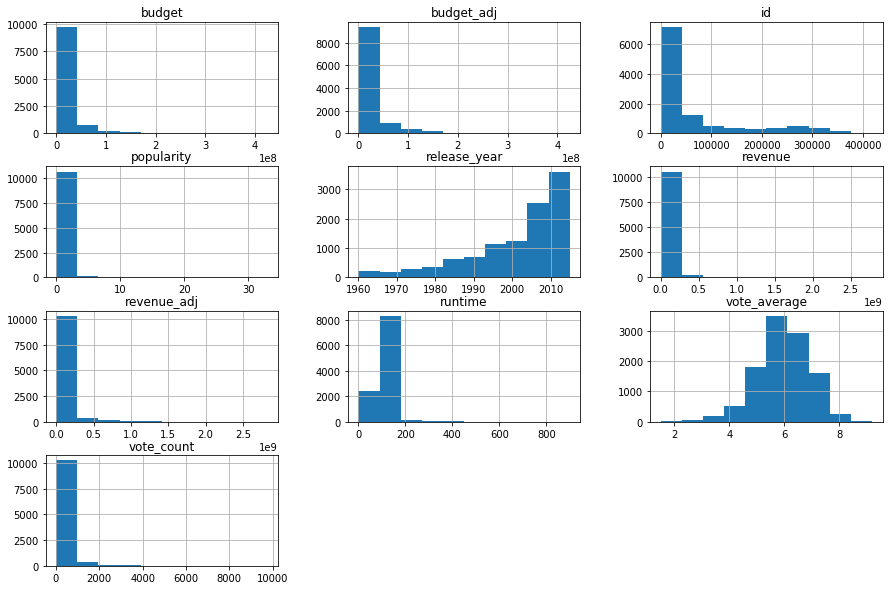

In [48]:
#Visualizing to get a better understanding of the data distributions
df.hist(figsize = (15, 10)); 


### Data Cleaning


> First of all I'll drop any column that is irrelevant for this analysis such as (cast, homepage, overview, imdb_id, keywords, production_companies, tagline) and it will improve the database readability.
 

In [49]:
#droping irrelevant columns
df.drop(['cast', 'homepage', 'overview', 'imdb_id', 'keywords', 'production_companies','tagline'], axis = 1, inplace = True)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 14 columns):
id                10866 non-null int64
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
director          10822 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_date      10866 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(4), int64(6), object(4)
memory usage: 1.2+ MB


In [51]:
#check of null values
df.isnull().sum()

id                 0
popularity         0
budget             0
revenue            0
original_title     0
director          44
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

There is 23 movies that are missing genre information, and sence this dataset is huge the simplest way is to drop those movies. and there is 44 movies that are missing director names but the director name is irrelevant to this analysis but I wnat to have it just for more information.

In [52]:
#drop null values
df.dropna(inplace=True)

In [53]:
#check of null values
df.isnull().sum()

id                0
popularity        0
budget            0
revenue           0
original_title    0
director          0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

In [383]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10801 entries, 0 to 10865
Data columns (total 15 columns):
id                10801 non-null int64
popularity        10801 non-null float64
budget            10801 non-null int64
revenue           10801 non-null int64
original_title    10801 non-null object
director          10801 non-null object
runtime           10801 non-null int64
genres            10801 non-null object
release_date      10801 non-null datetime64[ns]
vote_count        10801 non-null int64
vote_average      10801 non-null float64
release_year      10801 non-null int64
budget_adj        10801 non-null float64
revenue_adj       10801 non-null float64
month             10801 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(7), object(3)
memory usage: 1.3+ MB


In [55]:
#change release_date datatype to date
df['release_date'] = pd.to_datetime(df['release_date'])

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10801 entries, 0 to 10865
Data columns (total 14 columns):
id                10801 non-null int64
popularity        10801 non-null float64
budget            10801 non-null int64
revenue           10801 non-null int64
original_title    10801 non-null object
director          10801 non-null object
runtime           10801 non-null int64
genres            10801 non-null object
release_date      10801 non-null datetime64[ns]
vote_count        10801 non-null int64
vote_average      10801 non-null float64
release_year      10801 non-null int64
budget_adj        10801 non-null float64
revenue_adj       10801 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(6), object(3)
memory usage: 1.2+ MB


In [57]:
df.head()

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


Now knowing the data is cleaned and trimmed, dataset is ready to be investigated, Compute statistics, create visualizations and answering the questions.

<a id='eda'></a>
## Exploratory Data Analysis

>



### Which genres are most popular?

In [384]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.

#mean of genres
genrePop = df.groupby(['genres'])['popularity'].mean()
genrePop

genres
Action             0.837782
Adventure          1.217868
Animation          0.817977
Comedy             0.538260
Crime              0.693807
Documentary        0.179317
Drama              0.553444
Family             0.739779
Fantasy            0.865390
Foreign            0.167124
History            0.764636
Horror             0.468638
Music              0.462125
Mystery            0.596896
Romance            0.707231
Science Fiction    1.082355
TV Movie           0.245873
Thriller           0.673381
War                0.767041
Western            0.690646
Name: popularity, dtype: float64

In [385]:
df.genres.nunique()

20

movies with more than one genre in this dataframe has | character between them

In [60]:
df['genres'] = df['genres'].apply(lambda x: x.split('|')[0])

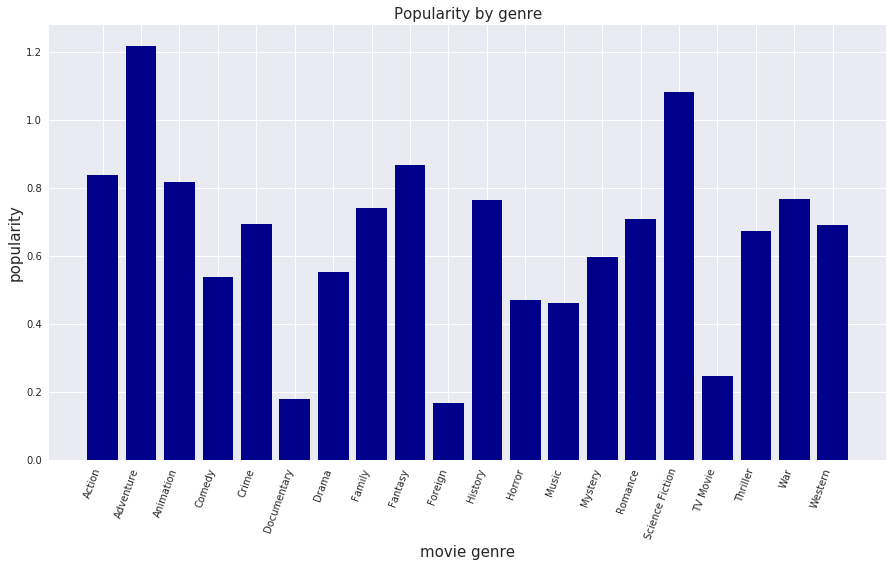

In [388]:
#using bar chart visualizing 

sns.set(rc={'figure.figsize':(15,8)})
plt.bar(genrePop.index, genrePop, color=('darkblue'))
plt.title('Popularity by genre', fontsize = 15)
plt.xlabel('movie genre',fontsize = 15)
plt.ylabel('popularity',fontsize = 15);

#rotate x-axis
plt.xticks(rotation=70, ha='right');


The graph shows that Adventure movies is the most popular genre followed by Science Fiction genre and then Fantasy and the forth most popular genre is Action and the fifth is Animation genre

###  Which year has the most releases of movies?

release_year
1960     32
1961     31
1962     32
1963     34
1964     42
1965     35
1966     46
1967     39
1968     39
1969     31
1970     40
1971     55
1972     40
1973     55
1974     46
1975     44
1976     47
1977     57
1978     65
1979     57
1980     78
1981     82
1982     81
1983     80
1984    105
1985    108
1986    121
1987    125
1988    144
1989    136
1990    132
1991    133
1992    133
1993    177
1994    184
1995    174
1996    203
1997    191
1998    210
1999    224
2000    226
2001    241
2002    266
2003    281
2004    307
2005    363
2006    408
2007    435
2008    488
2009    528
2010    480
2011    539
2012    581
2013    652
2014    694
2015    624
Name: id, dtype: int64


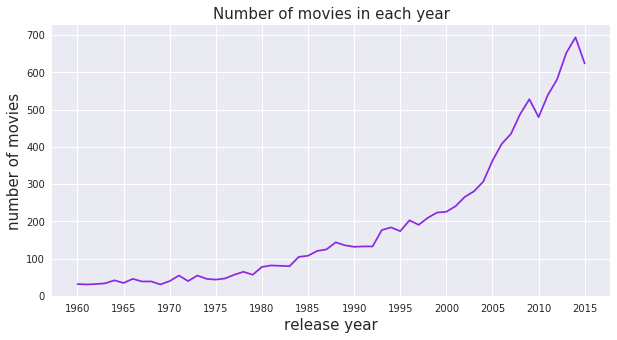

In [365]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.

#a group that counts each year and the number of movies in it
mostRel = df.groupby('release_year').count()['id']
print(mostRel)
#print(mostRel.tail())

#visualize the plot
mostRel.plot(xticks = np.arange(1960,2020,5), color=('blueviolet'))

sns.set(rc={'figure.figsize':(12,5)})
plt.title("Number of movies in each year",fontsize = 15)
plt.xlabel('release year',fontsize = 15)
plt.ylabel('number of movies',fontsize = 15);

> This graph shows us that the year 2014 has the highest release of movies which is 694 movie followed by the year 2013 which has 652 movies then the year 2015 which has 624. the lowest release of movies are both year 1961 and 1969  which has 31 movies followed by the years 1960 and 1962 that has 32 movies.

###  In which month movies make the best profit?

In [141]:
#creating a new column that extracts only month from 'release_date' column
df['month'] = df['release_date'].apply(lambda x: x.month)
df.head()

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,month
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,6
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,5
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,3
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,12
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,4


In [389]:
#group by the months and the sum of all revenues
monthRevenue = df.groupby('month')['revenue'].sum()
#group by the months and the sum of all adjusted revenues
monthRevenue_adj = df.groupby('month')['revenue_adj'].sum()
monthRevenue, monthRevenue_adj

(month
 1     12968479332
 2     19793785507
 3     31395913991
 4     26393260672
 5     50454865815
 6     61660585217
 7     45371225481
 8     25477766900
 9     25731480293
 10    29353709677
 11    45896256786
 12    58211863204
 Name: revenue, dtype: int64, month
 1     1.741505e+10
 2     2.345234e+10
 3     4.069289e+10
 4     3.165386e+10
 5     6.168336e+10
 6     8.071322e+10
 7     5.854923e+10
 8     3.255990e+10
 9     3.095786e+10
 10    3.844519e+10
 11    5.849808e+10
 12    8.349306e+10
 Name: revenue_adj, dtype: float64)

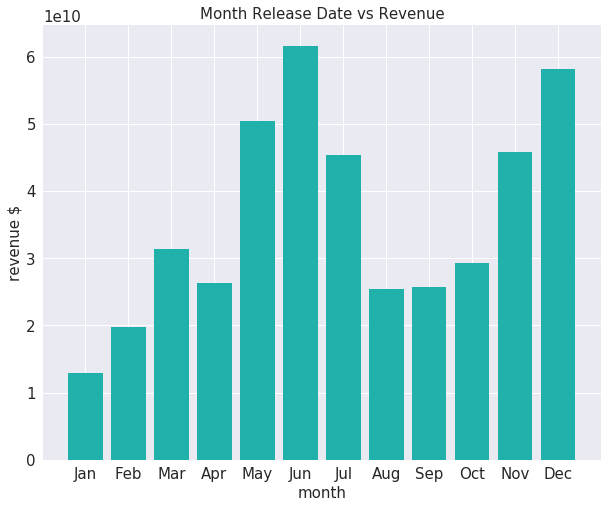

In [379]:
#visualize the plot
sns.set(rc={'figure.figsize':(10,8)}, font_scale=1.5)
plt.bar([1,2,3,4,5,6,7,8,9,10,11,12], monthRevenue, tick_label = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],color=('lightseagreen'))
plt.title('Month Release Date vs Revenue',fontsize = 15)
plt.ylabel('revenue $',fontsize = 15)
plt.xlabel('month',fontsize = 15);

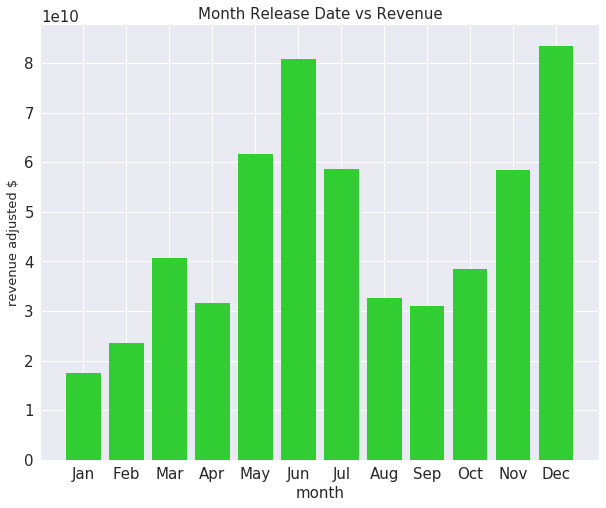

In [380]:
#another graph for revenue adjustment
sns.set(rc={'figure.figsize':(10,8)}, font_scale=1.5)
plt.bar([1,2,3,4,5,6,7,8,9,10,11,12], monthRevenue_adj, tick_label = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], color=('limegreen'))
plt.title('Month Release Date vs Revenue',fontsize = 15)
plt.ylabel('revenue adjusted $',fontsize = 13)
plt.xlabel('month',fontsize = 15);

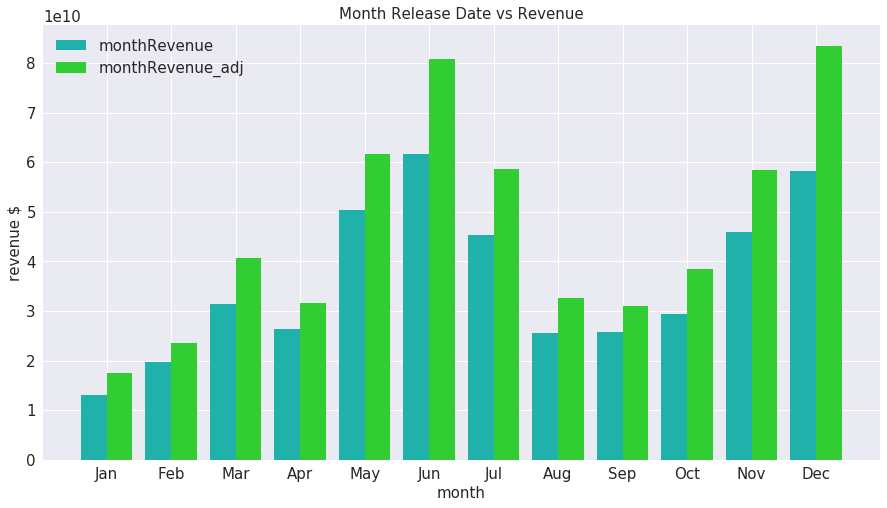

In [390]:
#combining the two bar charts
sns.set(rc={'figure.figsize':(15,8)}, font_scale=1.5)
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
x_axis = np.arange(len(months))

plt.bar(x_axis -0.2, monthRevenue, width=0.4, label = monthRevenue, color=('lightseagreen'))
plt.bar(x_axis +0.2, monthRevenue_adj, width=0.4, label = monthRevenue_adj, color=('limegreen'))
plt.title('Month Release Date vs Revenue',fontsize = 15)
plt.ylabel('revenue $',fontsize = 15)
plt.xlabel('month',fontsize = 15);
plt.xticks(x_axis, months)
#adding legend
plt.legend(['monthRevenue', 'monthRevenue_adj'] )
plt.show()

>The best two months are June and December, This is primarily so because each one of those months meets an event/season

>July is in the months of summer and the months of summer are the ideal time of the year, so blockbuster producers  will make more money in this season.


>December is during the season of Thanksgiving, Christmas and New Year. so this month is perfect for blockbuster producers to make more money in this season.

## What is the top 10 highest-grossing movies?

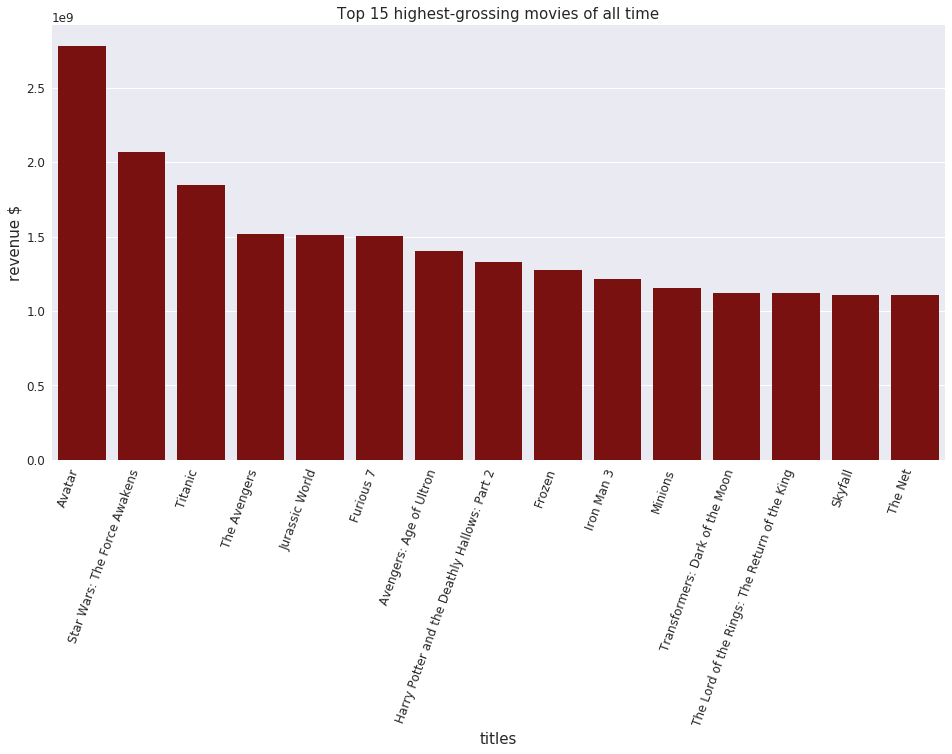

In [382]:
#title and revenue set
moviesRevenue = df[['original_title', 'revenue','release_year','genres']]
sns.set(rc={'figure.figsize':(16,8)}, font_scale=1.2)

#a bar plot that shows the highest-grossing movies ascending
sns.barplot(moviesRevenue.sort_values(by = "revenue", ascending=False).head(15).original_title, moviesRevenue.sort_values(by = "revenue", ascending=False).head(15).revenue, color=('darkred'))

plt.title('Top 15 highest-grossing movies of all time',fontsize = 15)
plt.ylabel('revenue $',fontsize = 15)
plt.xlabel('titles',fontsize = 15);
#rotate x-axis
plt.xticks(rotation=70, ha='right');

We learn from this graph that the top 10 highest-grossing movies are: 
>1- Avatar : $2,78B

>2- Star Wars: The Force Awakens : $2,06B

>3- Titanic : $1,84B

>4- The Avengers : $1,519B

>5- Jurassic World : $1,513B

>6-  Furious 7 : $1,506B

>7- Avengers: Age of Ultron : $1,40B

>8-Harry Potter and the Deathly Hallows: Part 2 : $1,32B

>9-Frozen : $1,27B

>10-Iron Man 3 : $1,21B

In [377]:
#to see the release_year of each movie of the top 10
moviesRevenue.sort_values(by="revenue", ascending=False).head(10)

,original_title,revenue,genres
1386,Avatar,2781505847,Action
3,Star Wars: The Force Awakens,2068178225,Action
5231,Titanic,1845034188,Drama
4361,The Avengers,1519557910,Science Fiction
0,Jurassic World,1513528810,Action
4,Furious 7,1506249360,Action
14,Avengers: Age of Ultron,1405035767,Action
3374,Harry Potter and the Deathly Hallows: Part 2,1327817822,Adventure
5422,Frozen,1274219009,Animation
5425,Iron Man 3,1215439994,Action


<a id='conclusions'></a>
## Conclusions


>On the  Which genres are most popular question I was shocked that the Action genre comes as four, I thought that it will be the second at minimum, but what statics shows that Adventure movies is the most popular genre, followed by Science Fiction, Fantasy which is reasonable to be there because it has a huge fanbase.

>We can notice that the film industry is ascending year after year. but the boost that happens in the 21st century is extremely huge.


> In the top 10 highest-grossing movies, one of them in the 1990s, one of them is in 2009, 8 of them are in the 2010s which ensures the boost that I notice in the second graph that the film industry had a huge boost that happened in the 21st century.

> In the top 10 highest-grossing movies, the main genre of 6 out the top 10 are Action, the rest of the 4 are Drama, Science Fiction, Adventure and Animation. This shows that the action is probably the safest option to make a movie that would break the box office.

>The best two months to drop your movie are June and December, This is primarily so because each one of those months meets an event/season, July is in the months of summer and the months of summer are the ideal time of the year, so blockbuster producers will make more money in this season. December is during the season of Thanksgiving, Christmas and New Year. so this month is perfect for blockbuster producers to make more money in this season.


> **Limitations**:  the dataset has null values that I had to drop. Some of the values in Budget and Revenue has a zero '0' that may effect the analysis. 


## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [391]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0